In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f 
import import_ipynb
from EDA_limpieza import df_refugees, df_prices, df_equipment, df_personnel
from utils.hypothesis_functions import *


## Hipótesis 1

Se espera que los precios en Ucrania oscilen en función del número de refugiados que huyen del país y de la cercanía al frente de los puestos de venta. Asimismo, un peor rendimiento por parte del bando ruso debería animar a los proveedores a vender en el país y aumentar la oferta

(Más refugiados, mayor lejanía del frente o más pérdidas rusas = precios más bajos)

### Proceso

- Miro el dataframe "df_prices"

In [5]:
df_prices.head()

,usdprice,market,commodity,longitude
date,,,,
2022-03-15,4.8148,Rivne,Antibiotics (imported),26.251617
2022-03-15,1.0399,Rivne,Antibiotics (local),26.251617
2022-03-15,0.4625,Rivne,Antipyretic (local),26.251617
2022-03-15,0.3667,Rivne,Vasodilating agents (local),26.251617
2022-03-15,1.5907,Rivne,Vasodilating agents (imported),26.251617


- Separo el dataframe en dos en función de si trata con medicamentos locales o importados
- Creo una función ad hoc que me dibuja un gráfico de tipo lmplot pero que, dado que voy a necesitar un par (el de importados y el de locales), y serán muy parecidos, que lo haga con algunos valores por defecto. Así me ahorro escribir lo mismo dos veces. No me la llevo a utils porque solo sirve para este caso

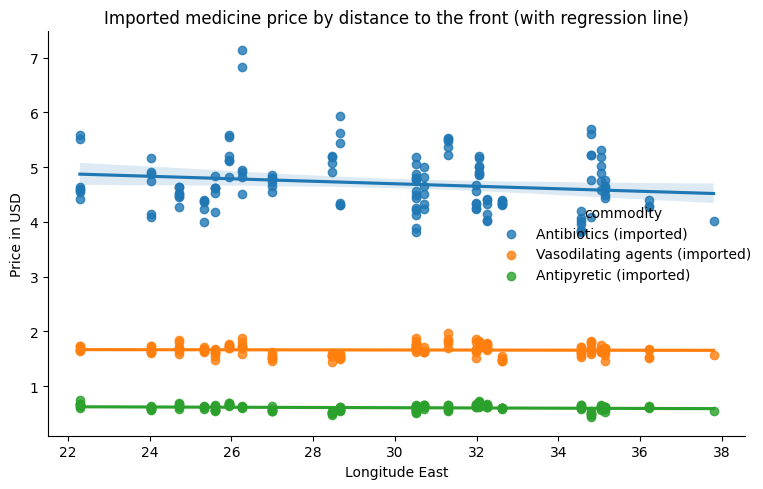

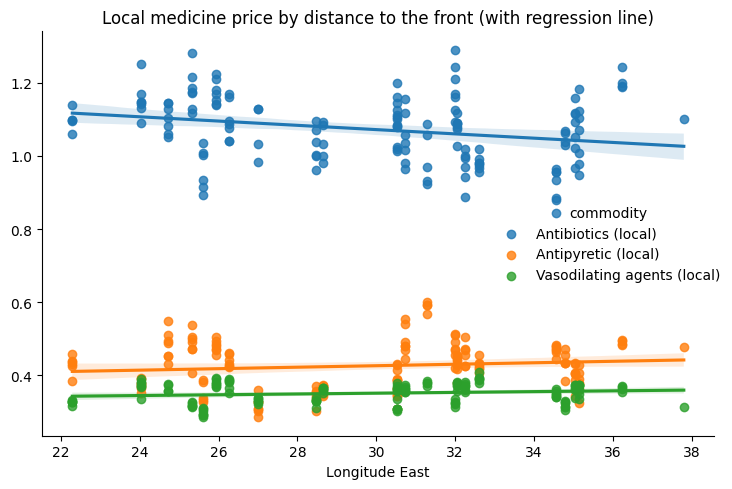

In [6]:
df_prices_imported = df_prices[df_prices['commodity'].str.contains('imported')]
df_prices_local = df_prices[df_prices['commodity'].str.contains('local')]


'''Creates a seaborn lmplot with regression lines using a few default values'''
def creates_lmplot_w_regression_line(data, x="longitude", y="usdprice", hue="commodity", xlabel='Longitude East', ylabel=None, title=None):
    '''Requires a dataframe and two column names. Other parameters are optional and homonym to the ones used in a seaborn lmplot'''
    sns.lmplot(data=data, x=x, y=y, hue=hue)
    plt.ylabel(ylabel=ylabel)
    plt.xlabel(xlabel=xlabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()  


creates_lmplot_w_regression_line(df_prices_imported, ylabel='Price in USD', title='Imported medicine price by distance to the front (with regression line)')
creates_lmplot_w_regression_line(df_prices_local, title='Local medicine price by distance to the front (with regression line)')


- Salta a la vista que una mayor distancia al frente no reduce necesariamente el precio de las medicinas
- Se nota, también, que los precios de los importados son muy superiores
- El precio de los locales oscila mucho para los tres medicamentos, lo que hace pensar que no hay un suministro estable. Eso explicaría que se importen tantos como para que Naciones Unidas los haya clasificado en dos grupos
- Ocurre lo mismo con los antibióticos de importación. Como no necesito ya la distancia al frente, me basta con calcular la desviación típica de los precios para hacerme una idea de cuán superior es la dispersión de los antibióticos

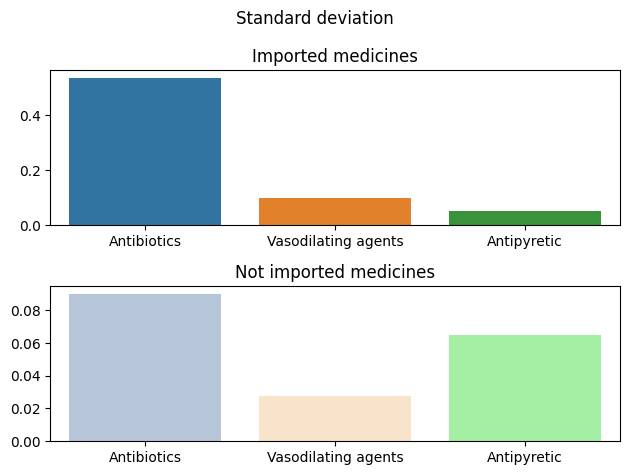

In [9]:
df_imp_antibiotics, df_imp_antipyretic, df_imp_vasodilating = [table for med, table in df_prices_imported.groupby('commodity')]
df_loc_antibiotics, df_loc_antipyretic, df_loc_vasodilating = [table for med, table in df_prices_local.groupby('commodity')]

plt.subplot(2, 1, 1)
sns.barplot(x=['Antibiotics','Vasodilating agents','Antipyretic'], y=[df_imp_antibiotics['usdprice'].std(), df_imp_vasodilating['usdprice'].std(), df_imp_antipyretic['usdprice'].std()])
plt.title('Imported medicines')
plt.subplot(2, 1, 2)
sns.barplot(x=['Antibiotics','Vasodilating agents','Antipyretic'], y=[df_loc_antibiotics['usdprice'].std(), df_loc_vasodilating['usdprice'].std(), df_loc_antipyretic['usdprice'].std()], 
                                                                    palette = ['lightsteelblue','bisque', 'palegreen']
            )
plt.title('Not imported medicines')
plt.suptitle('Standard deviation')
plt.tight_layout()
plt.show()


- La desviación típica es mayor en el caso de los antibióticos comparada con los otros dos para los dos casos. Ahora bien

In [11]:



def Ftest(grupo1,grupo2):
    a1 = 1.0*np.array(grupo1)
    n1 = len(a1)
    a2 = 1.0*np.array(grupo2)
    n2 = len(a2)
    s1, s2 = np.std(a1,ddof=1), np.std(a2,ddof=1)
    test=(s1/s2)**2
    p_valor=2*min(f.cdf(test,n1-1,n2-1),1-f.cdf(test,n1-1,n2-1))
    print ("El F experimenta es:",test,"El p-valor es:", p_valor)



Ftest(df_imp_antibiotics['usdprice'], df_loc_antibiotics['usdprice'])

NameError: name 'f' is not defined